<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/TA_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAs having fun

Authors: Jillian Eirini Nina and Ellie

Some update about our tasks that we are going to work on.
Testing123123123



In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 163kB 7.9MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=d6ae8e190f7204cc800301b0015f02e4bf11df9d90dbbfb77b11c2793321e60e
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=38cdea3c678af98ad81ae79f6fb4df9baeffe73f66718b8b93d66fa5c400dd6b
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.3MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-14 19:07:59--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3052 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.98K  --.-KB/s    in 0s      

2020-05-14 19:07:59 (61.4 MB/s) - ‘Fairmont.py’ saved [3052/3052]



# Task Definition

Write a paragraph describing what is included in your task.

# Executive Summary 

Highlight dominant constraints and your recommendation for the design.


# Constraints

* Relevant regulations
* client expectations
* site and budget
* process capabilities including process design equations
* ease of use 
* operation requirements
* maintainence requirements

# Physics

Briefly describe the physics that will determine whether your portion of the design succeeds or fails. Present relevant equations describing those physical laws and explain how you will use those concepts to guide your design.

Replace this with equations that are important to your part of the design. Explain what each equation means.

$$ F = ma$$

where $F$ is the force, $m$ is the mass, and $a$ is the acceleration.

# Table listing potential strategies to meet the constraints and treatment objectives

Please remove my two rows of examples!

| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| physics-based design | high potential for success | requires knowledge | lots |
| wishful design | easy design steps | likely won't work | none |



# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN
9,decanter centrifuge (resid) GN Solids Control...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

Write several paragraphs describing the major decisions that you will need to make in order to create a design and outline a strategy for how you will obtain the necessary information to make those decisions.

# Next Steps and Challenges

Summarize the next steps that you will be taking to move the design forward. Identify any challenges where you may need assistance.

# Design

Begin writing the code to start your design. Define flow rates, mass rates, energy requirements, and any readily calculated dimensions, velocities, flows, etc.

In [4]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')
print('Number of mechanical sed tanks is',fmt.n_sed_mech)
print('Number of hydraulic sed tanks is',fmt.n_sed_hyd)

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy
Number of mechanical sed tanks is 8
Number of hydraulic sed tanks is 8



Design a rapid mix unit given a set amount of head loss with a target of having a large eddy turnover time of 0.3 s. 
We have the equation for eddy turnover time. Larger eddies turn over more slowly and thus to obtain a fast turnover time we need to inject chemicals closely spaced so that the eddy turnover time is reduced.

[Eddy turnover time: AguaClara textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#equation-eq-t-eddy)

$$t_{eddy} \approx \left( \frac{L_{eddy}^2}{ \bar\varepsilon }\right)^\frac{1}{3}$$

We can use the center to center distance of the contractions (and injection ports) as the eddy length scale. This is because the eddies will need to mix over the length scale of the spacing of the injection ports.

We also have a relationship between head loss and energy dissipation rate

$$g h_e = \theta \bar\varepsilon $$

where $\theta$ is $t_{eddy}$. Eliminate the unknown $\bar\varepsilon$

$$t_{eddy} \approx \left( \frac{L_{eddy}^2 t_{eddy}}{ g h_e }\right)^\frac{1}{3}$$

Solve for $L_{eddy}$ which is the spacing of the contractions and the spacing of the coagulant injection points.

$$L_{eddy} \approx  t_{eddy} \sqrt{g h_e }$$

The rapid mix unit will be created by placing round cylinders vertically in the inlet channel. The goal is to minimize the number of chemical injection points and thus to use as large a spacing between cylinders, $L_{eddy}$, as possible.

The dimensions of the opening between cylinders and the diameter of the cylinders can be obtained by analyzing the head loss through a flow expansion.

$$h_e = \left(\frac{A_{exp}}{A_{con}} -1 \right)^2 \, \frac{\bar  v_{exp}^2}{2g}$$ 

We can solve the head loss equation for the dimensions of the contractions.

[flow expansion head loss: AguaClara textbook](https://aguaclara.github.io/Textbook/Review/Review_Fluid_Mechanics.html?highlight=flow%20expansion%20head%20loss#equation-eq-exp-v-out)

where con = contracted control surface and exp = expanded control surface
solve for the area ratio

$$\frac{A_{exp}}{A_{con}}=\frac{\sqrt{2gh_e}}{\bar  v_{exp}} + 1$$

Here the area ratio is also equal to the width ratios because the depth of flow is the other dimension. We assume here that the depth of flow is large compared with the head loss.

$$\frac{A_{exp}}{A_{con}} = \frac{\bar v_{con}}{\bar v_{exp}}$$

$$\frac{W_{con}}{W_{exp}} = \frac{A_{con}}{A_{exp}}$$

The width of the expanded flow, $W_{exp}$, is equal to the large eddy length scale, $L_{eddy}$.

$$W_{con} = L_{eddy}\frac{A_{con}}{A_{exp}}$$

The diameter of the cylinder is equal to 

$$D_{cylinder}=L_{eddy} - W_{con} $$


In [5]:
Head_loss_max = 20 * u.cm
t_eddy = 0.3 * u.s
L_eddy = (t_eddy * np.sqrt(u.gravity * Head_loss_max)).to(u.m)
print('The spacing between injection ports is',L_eddy)


#expanded velocity
v_channel = 0.45 * u.m/u.s
Q_per_mixer = (v_channel * L_eddy**2).to(u.L/u.s)
print('The flow rate of raw water per chemical injection point is',Q_per_mixer)

Q=20000/7 * u.L/u.s #Fairmont design
A_channel = Q/v_channel
n_ports = (A_channel/L_eddy**2).to(u.dimensionless)
print('The number of injection ports is',(np.round(n_ports)).magnitude)

Pi_A = np.sqrt(2*u.gravity*Head_loss_max)/v_channel + 1
print('The expansion ratio is',Pi_A)
v_jet = v_channel * Pi_A
w_contraction = L_eddy/Pi_A
print('The width of the contractions is',w_contraction)

D_cyl = L_eddy - w_contraction
print('The diameter of the cylinder is',D_cyl)

The spacing between injection ports is 0.4201 meter
The flow rate of raw water per chemical injection point is 79.43 liter / second
The number of injection ports is 36.0
The expansion ratio is 5.401 dimensionless
The width of the contractions is 0.07779 meter
The diameter of the cylinder is 0.3424 meter


NameError: ignored

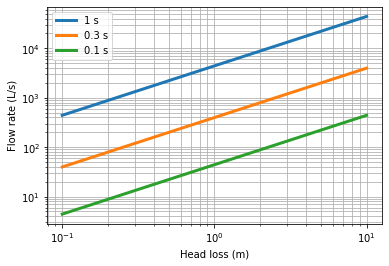

In [6]:
n_points = 50
h_e_graph = np.logspace(-1,1,n_points) * u.m

v_channel = 0.45 * u.m/u.s
def Q_per_mixer(t_eddy):
  return (u.gravity * h_e_graph * t_eddy**2 * v_channel).to(u.L/u.s)

plt.plot(h_e_graph,Q_per_mixer(1*u.s),linewidth=3)
plt.plot(h_e_graph,Q_per_mixer(0.3*u.s),linewidth=3)
plt.plot(h_e_graph,Q_per_mixer(0.1*u.s),linewidth=3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Head loss (m)')
plt.ylabel('Flow rate (L/s)')
plt.grid(which='both')
plt.legend(['1 s','0.3 s','0.1 s'])
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

In [8]:
A_sed_MRI = 74 * u.ft * 110 * u.ft
Q_sed_MRI= 50 * u.Mgal/u.day
v_up_MRI = (Q_sed_MRI/A_sed_MRI).to(u.mm/u.s)
print(v_up_MRI)

2.897 millimeter / second
